In [1]:
%load_ext autoreload
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[-0.  0.  0. ... -0. -0.  0.]
 [-0.  0.  0. ... -0. -0.  0.]
 [-0.  0.  0. ... -0. -0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


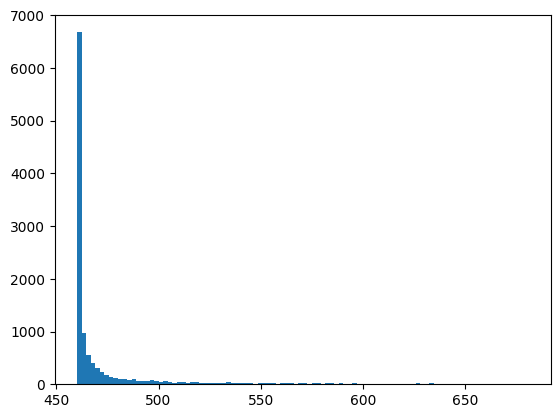

In [3]:
%autoreload 2
# 10/12/2023 - NEW (2 days of optimization) COMPUTATION WITH MASK ON GPU
%run ../src/boson_cloud_gpu/main.py

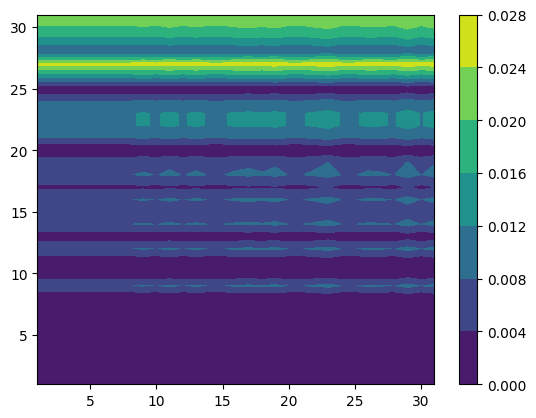

0
[0, 0]


In [10]:
import numpy

threads_per_block_x = numpy.array([2, 4, 8, 16, 32])
threads_per_block_y = numpy.arange(31) + 1

matrix_size_x = 21_000
matrix_size_y = 1_000

n_block_x = numpy.ceil(matrix_size_x / threads_per_block_x)
n_block_y = numpy.ceil(matrix_size_y / threads_per_block_y)

unused_threads_perc_x = 1 - matrix_size_x / (threads_per_block_x * n_block_x)
unused_threads_perc_y = 1 - matrix_size_y / (threads_per_block_y * n_block_y)

xx, yy = numpy.meshgrid(unused_threads_perc_x, unused_threads_perc_y)

zz = xx + yy

import matplotlib.pyplot as plt

plt.contourf(threads_per_block_x, threads_per_block_y, zz)
plt.colorbar()
plt.show()

argmin = zz.argmin()
print(argmin)
coords = [argmin // 32, argmin % 32]
print(coords)